<a href="https://colab.research.google.com/github/hae-song/python-lecture/blob/main/d16_01_j.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%run my_init.py

Mounted at /content/drive
tf.__version__: 2.8.0
keras.__version__: 2.8.0


In [2]:
%matplotlib inline

In [4]:
model = keras.models.load_model(r'/content/drive/MyDrive/Colab Notebooks/best-cnn-model.h5')
#r을 쓰면 경로 한글도 가능

In [5]:
model.layers

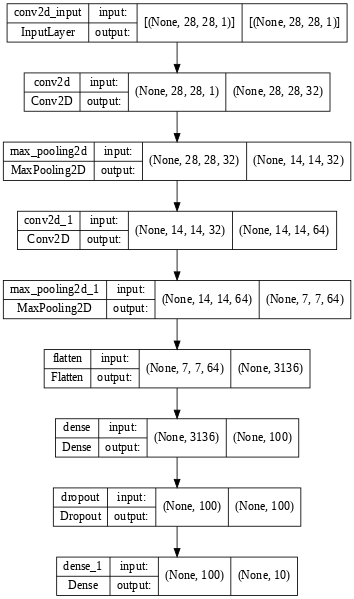

In [6]:
keras.utils.plot_model(model, show_shapes=True, dpi=60)

In [7]:
conv = model.layers[0]

In [8]:
conv.weights[0].shape, conv.weights[1].shape
#tensor라는 객체의 shape을 본것.
#3,3 : weight

(TensorShape([3, 3, 1, 32]), TensorShape([32]))

In [9]:
#?keras.layers.Layer.weights
#type : property
#layer은 weight를 가지고 있다.


In [10]:
np.mean(conv.weights[0]), np.std(conv.weights[0])

(-0.017890386, 0.24312827)

In [11]:
np.min(conv.weights[0]), np.max(conv.weights[0])

(-1.3584385, 0.41712838)

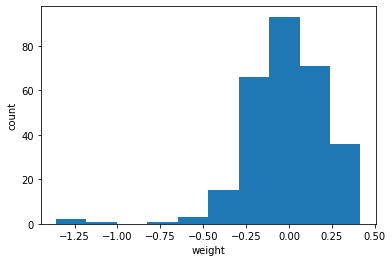

In [12]:
plt.hist(conv.weights[0].numpy().reshape(-1))
#방금 tensor을 numpy형식으로 바꾼것
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

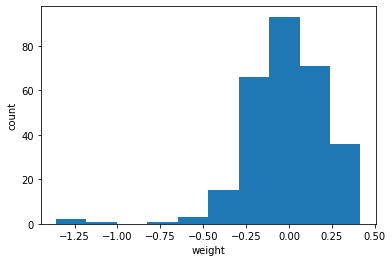

In [13]:
plt.hist(conv.weights[0].numpy().ravel()) #flatten()
#방금 tensor을 numpy형식으로 바꾼것
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

In [14]:
conv.weights[0].numpy()[:, :, 0, 0] #첫번째 필터의 커널 정보(가중치) <- 학습의 결과
#3*3인 weights 

array([[ 0.01145123,  0.01649246,  0.14738083],
       [-0.01349517,  0.13081188,  0.17476639],
       [ 0.07819083,  0.1754955 , -0.11859898]], dtype=float32)

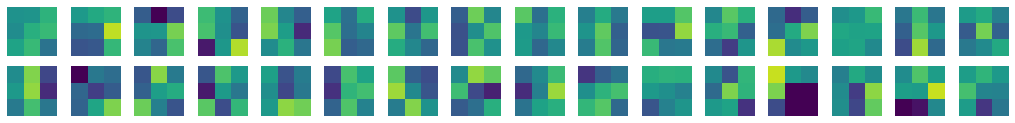

In [15]:
fig, axes = plt.subplots(2, 16, figsize=(18, 2))
for i in range(2):
  for j in range(16):
    axes[i, j].imshow(conv.weights[0].numpy()[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
    axes[i, j].axis('off')
plt.show()

In [16]:
no_training_model = keras.Sequential()
#학습이 안된 모델 : 고르게 나온다 유니폼분포

In [17]:
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, padding='same', input_shape=(28, 28, 1), activation='relu'))

In [18]:
no_training_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [19]:
no_training_model.layers
#학습이 안된 모델 : 고르게 나온다 유니폼분포

In [20]:
no_training_conv = no_training_model.layers[0]
no_training_conv.weights[0].shape, no_training_conv.weights[1].shape

(TensorShape([3, 3, 1, 32]), TensorShape([32]))

In [21]:
np.mean(no_training_conv.weights[0]), np.std(no_training_conv.weights[0])

(-0.0006697985, 0.08235967)

In [22]:
np.min(no_training_conv.weights[0]), np.max(no_training_conv.weights[0])

(-0.14191927, 0.14190887)

In [23]:
from scipy.stats import uniform

rv = uniform.rvs(0, 1, 1000, random_state=42)
rv.shape

(1000,)

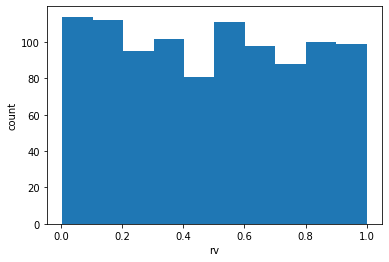

In [24]:
plt.hist(rv.ravel())
plt.xlabel('rv')
plt.ylabel('count')
plt.show()

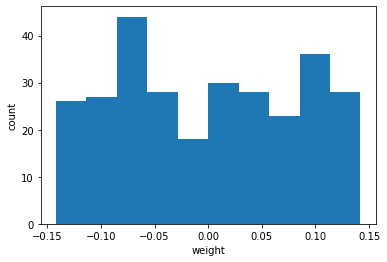

In [25]:
plt.hist(no_training_conv.weights[0].numpy().reshape(-1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

In [26]:
rv = uniform.rvs(0, 1, (3, 3, 1, 32), random_state=42)
rv.shape

(3, 3, 1, 32)

In [27]:
no_training_conv.weights[0].numpy()[:, :, 0, 0]

array([[-5.0214604e-02, -5.9770733e-02,  9.2075497e-02],
       [ 9.1522932e-05,  1.0354841e-01, -9.2140600e-02],
       [ 1.3653208e-01,  1.2943403e-01,  4.6998262e-04]], dtype=float32)

In [28]:
no_training_conv.weights[0].numpy().min(), no_training_conv.weights[0].numpy().max()

(-0.14191927, 0.14190887)

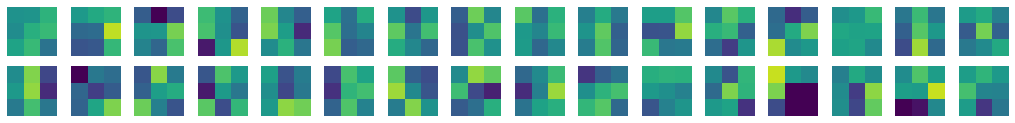

In [29]:
fig, axes = plt.subplots(2, 16, figsize=(18, 2))
for i in range(2):
  for j in range(16):
    axes[i, j].imshow(conv.weights[0].numpy()[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
    axes[i, j].axis('off')
plt.show()

In [30]:
dense1 = keras.layers.Dense(100, activation='sigmoid', name='dense1')
dense2 = keras.layers.Dense(10, activation='softmax', name='dense2')

In [31]:
inputs = keras.Input(shape=(784,), name='input') 
inputs

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'input')>

In [32]:
hidden = dense1(inputs)
hidden

<KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'dense1')>

In [33]:
outputs = dense2(hidden)
outputs

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense2')>

In [34]:
functional_model = keras.Model(inputs,outputs)
functional_model

In [35]:
inputs = keras.Input(shape=(784,))

In [36]:
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [37]:
model.layers

In [38]:
model.layers[0].output

<KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer 'conv2d')>

In [39]:
conv_acti = keras.Model(model.input, model.layers[0].output)
conv_acti.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [40]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [41]:
X_train.shape

(60000, 28, 28)

In [42]:
X_train[0].shape

(28, 28)

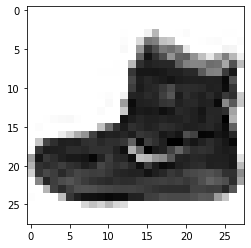

In [43]:
plt.imshow(X_train[0], cmap='gray_r')
plt.show()

In [44]:
inputs = X_train[0:1].reshape(-1, 28, 28, 1) / 255.0
inputs.shape

(1, 28, 28, 1)

In [45]:
feature_maps = conv_acti.predict(inputs)
feature_maps.shape

(1, 28, 28, 32)

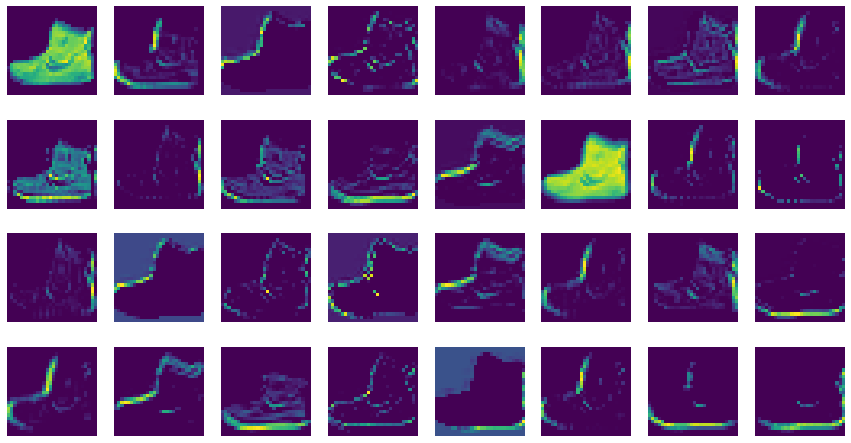

In [46]:
fig, axes = plt.subplots(4, 8, figsize=(15, 8))

for i in range(4):
  for j in range(8):
    axes[i, j].imshow(feature_maps[0, :, :, i*8 + j])
    axes[i, j].axis('off')
plt.show()

In [47]:
conv2_acti = keras.Model(model.input, model.layers[2].output)


In [48]:
feature_maps = conv2_acti.predict(X_train[0:1].reshape(-1,28,28,1)/255.0)
feature_maps.shape

(1, 14, 14, 64)

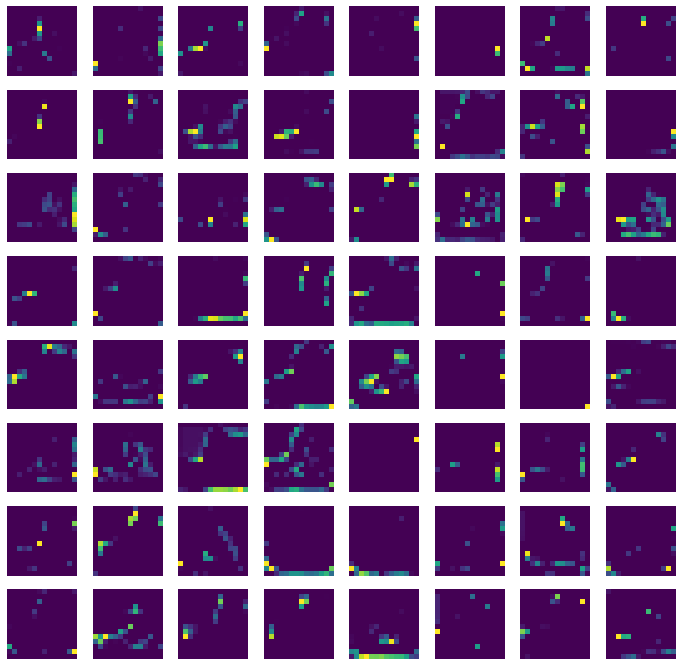

In [49]:
fig, axes = plt.subplots(8, 8, figsize=(12, 12))

for i in range(8):
  for j in range(8):
    axes[i, j].imshow(feature_maps[0, :, :, i*8 + j])
    axes[i, j].axis('off')
plt.show()

In [52]:
model.layers[0]

In [53]:
#model._layers 없다고 나옴
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [54]:
model.layers[0].output

<KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer 'conv2d')>